In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\KAMALI--9-9--\Downloads\Data science\Datasets\BlueOrRed.csv")

In [3]:
data.head()

,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,51,1,1,1,4,171.0,15,0
1,1,37,1,1,1,3,96.0,18,0
2,1,53,1,1,1,6,86.0,20,0
3,0,33,1,1,1,2,176.0,18,1
4,0,46,1,1,1,6,420.0,15,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Undecided      10000 non-null  int64  
 1   Age            10000 non-null  int64  
 2   HomeOwner      10000 non-null  int64  
 3   Female         10000 non-null  int64  
 4   Married        10000 non-null  int64  
 5   HouseholdSize  10000 non-null  int64  
 6   Income         10000 non-null  float64
 7   Education      10000 non-null  int64  
 8   Church         10000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


In [5]:
data.columns

Index(['Undecided', 'Age', 'HomeOwner', 'Female', 'Married', 'HouseholdSize',
       'Income', 'Education', 'Church'],
      dtype='object')

In [6]:
data.shape

(10000, 9)

In [7]:
data.isnull().any()

Undecided        False
Age              False
HomeOwner        False
Female           False
Married          False
HouseholdSize    False
Income           False
Education        False
Church           False
dtype: bool

In [8]:
data.corr()

,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
Undecided,1.000000,0.052710,0.132689,0.166553,0.059165,0.064899,-0.109833,0.297538,-0.315407
Age,0.052710,1.000000,0.019706,-0.030038,-0.050663,-0.131152,-0.119671,0.283178,-0.016718
HomeOwner,0.132689,0.019706,1.000000,0.020501,0.084496,0.051778,0.080007,0.242779,0.006392
Female,0.166553,-0.030038,0.020501,1.000000,0.003540,0.018748,-0.006404,-0.015182,0.004767
Married,0.059165,-0.050663,0.084496,0.003540,1.000000,0.479347,0.245220,0.052426,-0.002053
HouseholdSize,0.064899,-0.131152,0.051778,0.018748,0.479347,1.000000,0.186828,-0.089153,0.006292
Income,-0.109833,-0.119671,0.080007,-0.006404,0.245220,0.186828,1.000000,0.054807,0.000858
Education,0.297538,0.283178,0.242779,-0.015182,0.052426,-0.089153,0.054807,1.000000,-0.002391
Church,-0.315407,-0.016718,0.006392,0.004767,-0.002053,0.006292,0.000858,-0.002391,1.000000


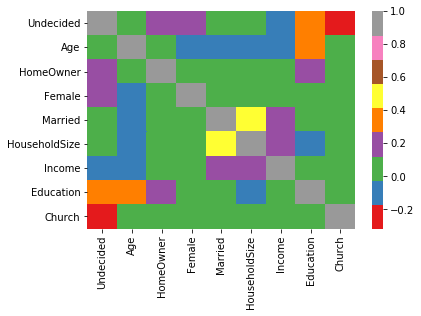

In [9]:
sns.heatmap(data.corr(),cmap='Set1')

1)Data imputing  is not necessary because there is no non assigned values.
2)Data encoding is not needed as the values are already in the form of intergers and float.

In [10]:
x=data.drop(['Undecided'],axis=1)

In [11]:
y=data.loc[:,'Undecided']

In [12]:
x

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,51,1,1,1,4,171.0,15,0
1,37,1,1,1,3,96.0,18,0
2,53,1,1,1,6,86.0,20,0
3,33,1,1,1,2,176.0,18,1
4,46,1,1,1,6,420.0,15,1
...,...,...,...,...,...,...,...,...
9995,27,1,1,0,1,140.5,12,0
9996,32,1,1,1,2,79.0,11,1
9997,35,0,1,0,1,15.0,8,1
9998,26,0,0,0,5,5.0,11,1


In [13]:
y

0       1
1       1
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Undecided, Length: 10000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3)

In [16]:
xtrain.shape

(7000, 8)

In [17]:
ytrain.shape

(7000,)

In [18]:
xtest.shape

(3000, 8)

In [19]:
ytest.shape

(3000,)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc=RandomForestClassifier()

In [22]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
ypred=rfc.predict(xtest)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1838
           1       1.00      0.96      0.98      1162

    accuracy                           0.98      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



# Without changing the hyperparameters
it's Prediction is 98% from the total of 1794 values
it can recall upto 100% but this is an ideal condition


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc1=RandomForestClassifier(n_estimators=30,max_samples=1000,verbose=1,min_samples_split=2,max_leaf_nodes=2)

In [28]:
rfc1.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=2, max_samples=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [29]:
ypred1=rfc1.predict(xtest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1838
           1       1.00      0.01      0.02      1162

    accuracy                           0.62      3000
   macro avg       0.81      0.50      0.39      3000
weighted avg       0.76      0.62      0.47      3000



# Changing the hyperparameters
Changes in the parameters 
n_estimators=30,max_samples=1000,verbose=1,min_samples_split=2,max_leaf_nodes=2 
it's Prediction is only 60% 
Hence, the precision of the model is affected with the major changes in the features.

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc=DecisionTreeClassifier()

In [48]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
ypred3=dtc.predict(xtest)

In [50]:
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1838
           1       0.95      0.96      0.95      1162

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr=LogisticRegression()

In [59]:
lr.fit(xtrain,ytrain)

C:\Users\KAMALI--9-9--\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
ypredl=lr.predict(xtest)

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
ada=AdaBoostClassifier(base_estimator=rfc1)

In [71]:
ada.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=2,
                                                         max_samples=1000,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                          

In [72]:
ypredadac=ada.predict(xtest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [73]:
print(classification_report(ytest,ypredadac))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1838
           1       0.95      0.94      0.95      1162

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

